# TODO:
- DataTransformer
    - is_test=False - is it needed?
- randomize train/valid split

# Imports

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Constants

# Sample (get) data

In [45]:
train_df = pd.read_csv('train_data.csv')

In [46]:
TRAIN_VALID_THRESHOLD = 3800
valid_df = train_df[TRAIN_VALID_THRESHOLD:]
train_df = train_df[:TRAIN_VALID_THRESHOLD]

# Explore (visualize) data

In [47]:
train_df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,257522,2014,640,4,terraced,individual_heating,management_in_trust,90.0,1174.0,0~5min,0-5min,7.0,20.0,Myung-duk,9,14.0,17.0
3796,276991,2005,914,21,mixed,individual_heating,management_in_trust,67.0,798.0,0~5min,5min~10min,6.0,0.0,Bangoge,7,13.0,15.0
3797,353982,2014,910,15,terraced,individual_heating,management_in_trust,90.0,1174.0,0~5min,0-5min,7.0,20.0,Myung-duk,9,14.0,17.0
3798,116814,1992,576,9,corridor,individual_heating,management_in_trust,200.0,0.0,5min~10min,10min~15min,5.0,10.0,Myung-duk,3,16.0,17.0


In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SalePrice                  3800 non-null   int64  
 1   YearBuilt                  3800 non-null   int64  
 2   Size(sqf)                  3800 non-null   int64  
 3   Floor                      3800 non-null   int64  
 4   HallwayType                3800 non-null   object 
 5   HeatingType                3800 non-null   object 
 6   AptManageType              3800 non-null   object 
 7   N_Parkinglot(Ground)       3800 non-null   float64
 8   N_Parkinglot(Basement)     3800 non-null   float64
 9   TimeToBusStop              3800 non-null   object 
 10  TimeToSubway               3800 non-null   object 
 11  N_manager                  3800 non-null   float64
 12  N_elevators                3800 non-null   float64
 13  SubwayStation              3800 non-null   objec

In [49]:
train_df.nunique()

SalePrice                    815
YearBuilt                     16
Size(sqf)                     85
Floor                         43
HallwayType                    3
HeatingType                    2
AptManageType                  2
N_Parkinglot(Ground)          23
N_Parkinglot(Basement)        20
TimeToBusStop                  3
TimeToSubway                   5
N_manager                      9
N_elevators                   13
SubwayStation                  8
N_FacilitiesInApt              9
N_FacilitiesNearBy(Total)     11
N_SchoolNearBy(Total)         14
dtype: int64

In [50]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,3800.0,214250.255263,102981.419637,34070.0,141592.0,202654.0,278761.0,570796.0
YearBuilt,3800.0,2002.636579,8.640903,1978.0,1993.0,2006.0,2007.0,2015.0
Size(sqf),3800.0,963.222632,389.407575,135.0,644.0,910.0,1160.0,2337.0
Floor,3800.0,11.906579,7.518720,1.0,6.0,11.0,17.0,43.0
N_Parkinglot(Ground),3800.0,194.645789,218.341073,0.0,8.0,90.0,249.0,713.0
N_Parkinglot(Basement),3800.0,559.113158,399.699994,0.0,184.0,536.0,798.0,1321.0
N_manager,3800.0,6.292368,3.252722,1.0,5.0,6.0,8.0,14.0
N_elevators,3800.0,10.846316,7.631626,0.0,5.0,11.0,16.0,27.0
N_FacilitiesInApt,3800.0,5.716316,2.283430,1.0,4.0,5.0,7.0,10.0
N_FacilitiesNearBy(Total),3800.0,9.920263,3.393971,0.0,8.0,9.0,13.0,16.0


array([[<AxesSubplot: title={'center': 'SalePrice'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>,
        <AxesSubplot: title={'center': 'Size(sqf)'}>],
       [<AxesSubplot: title={'center': 'Floor'}>,
        <AxesSubplot: title={'center': 'N_Parkinglot(Ground)'}>,
        <AxesSubplot: title={'center': 'N_Parkinglot(Basement)'}>],
       [<AxesSubplot: title={'center': 'N_manager'}>,
        <AxesSubplot: title={'center': 'N_elevators'}>,
        <AxesSubplot: title={'center': 'N_FacilitiesInApt'}>],
       [<AxesSubplot: title={'center': 'N_FacilitiesNearBy(Total)'}>,
        <AxesSubplot: title={'center': 'N_SchoolNearBy(Total)'}>,
        <AxesSubplot: >]], dtype=object)

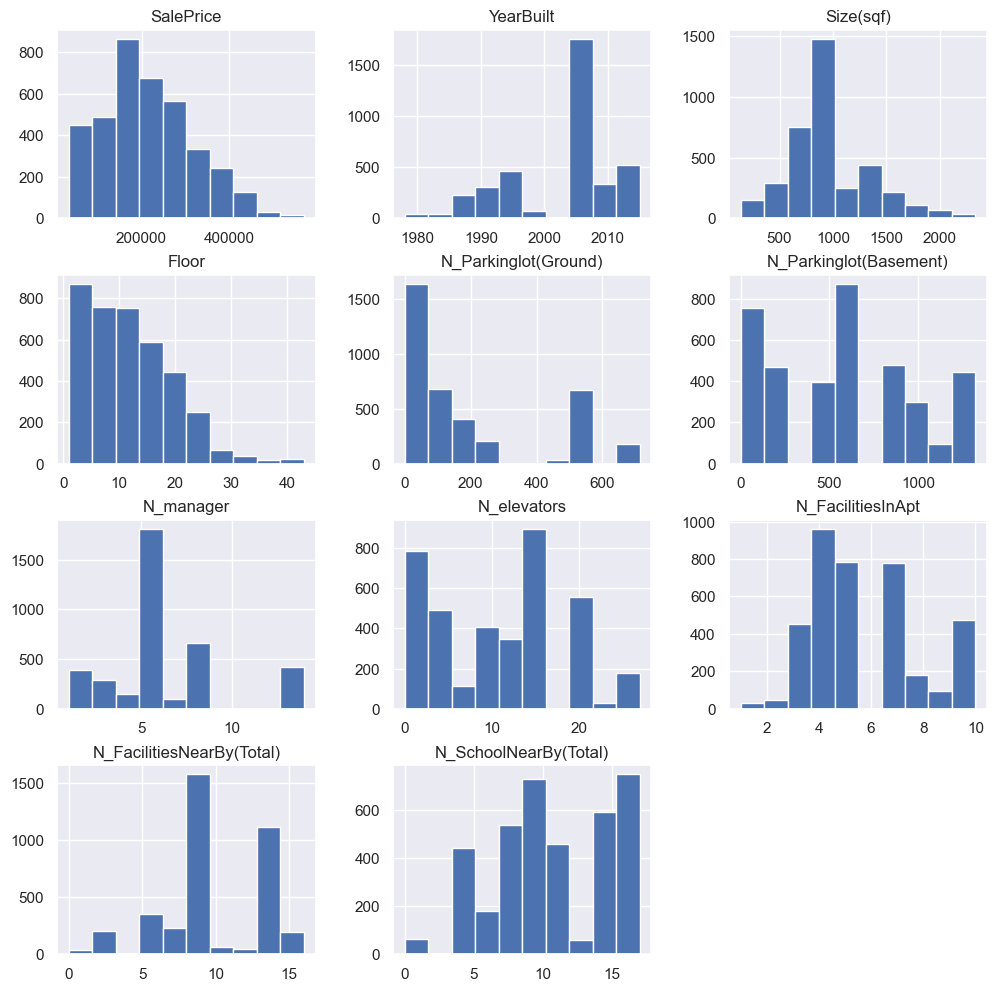

In [51]:
sns.set(rc={'figure.figsize':(12, 12)})  # set figsize
train_df.hist()

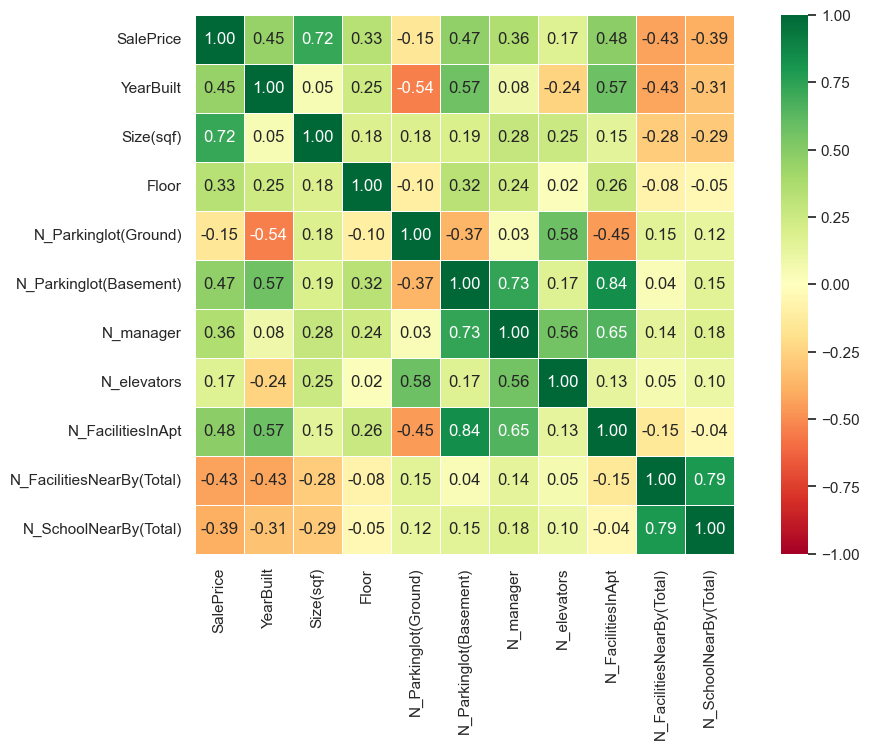

In [52]:
sns.set(rc={'figure.figsize':(12, 7)})  # set figsize
heatmap = sns.heatmap(train_df.corr(numeric_only=True), square=True, cmap='RdYlGn', annot=True, fmt=".2f", linewidth=0.5, vmin=-1, vmax=1)

# Modify data (using pipeline)

In [53]:
# check dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SalePrice                  3800 non-null   int64  
 1   YearBuilt                  3800 non-null   int64  
 2   Size(sqf)                  3800 non-null   int64  
 3   Floor                      3800 non-null   int64  
 4   HallwayType                3800 non-null   object 
 5   HeatingType                3800 non-null   object 
 6   AptManageType              3800 non-null   object 
 7   N_Parkinglot(Ground)       3800 non-null   float64
 8   N_Parkinglot(Basement)     3800 non-null   float64
 9   TimeToBusStop              3800 non-null   object 
 10  TimeToSubway               3800 non-null   object 
 11  N_manager                  3800 non-null   float64
 12  N_elevators                3800 non-null   float64
 13  SubwayStation              3800 non-null   objec

In [54]:
# split into X and y
y_train_df = train_df['SalePrice']
X_train_df = train_df.drop(columns='SalePrice')

In [55]:
numerical_features = X_train_df.select_dtypes(exclude='object').columns.tolist()
numerical_features

['YearBuilt',
 'Size(sqf)',
 'Floor',
 'N_Parkinglot(Ground)',
 'N_Parkinglot(Basement)',
 'N_manager',
 'N_elevators',
 'N_FacilitiesInApt',
 'N_FacilitiesNearBy(Total)',
 'N_SchoolNearBy(Total)']

In [56]:
categorical_features = X_train_df.select_dtypes(include='object').columns.tolist()
categorical_features

['HallwayType',
 'HeatingType',
 'AptManageType',
 'TimeToBusStop',
 'TimeToSubway',
 'SubwayStation']

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [58]:
numeric_pipeline = Pipeline(steps=[
    ('scale', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

full_processor = ColumnTransformer(transformers=[
    ('numerical', numeric_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [59]:
# y_train = y_train_df.to_numpy()
# y_train.shape

# Model training

In [60]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# model = Lasso(alpha=0.1)
model = RandomForestRegressor()

model_training_pipeline = Pipeline(steps=[
    ('preprocessor', full_processor),
    ('model', model)
])

In [61]:
_ = model_training_pipeline.fit(X_train_df, y_train_df)

# Assess (evaluate the performance of trained models)

In [62]:
# split into X and y
y_valid_df = valid_df['SalePrice']
X_valid_df = valid_df.drop(columns='SalePrice')

In [63]:
preds = model_training_pipeline.predict(X_valid_df)
mean_absolute_error(y_valid_df, preds)

57947.680147481864

In [64]:
mean_squared_error(y_valid_df, preds)

4897128001.074585

In [65]:
model_training_pipeline.score(X_valid_df, y_valid_df)

0.5166242516042996